In [33]:
import pandas as pd
import numpy as np


In [34]:
# gini_df = pd.read_csv('GINI.csv')
tax_union_df = pd.read_csv('tax_union_data.csv')
gov_spending_df = pd.read_csv('gov_spending.csv')
unemp_intrate_df = pd.read_csv('OECD_LONGTERM_UNEMPLOYMENT_CLEANED.csv')
pop_gdp_inf_df = pd.read_csv('pop_gdp_inf.csv')


In [35]:
# gini_df = gini_df.rename(columns={
#     'value': 'GINI',
#     'date': 'TIME_PERIOD',
#     'country': 'Reference area'
# })




unemp_intrate_df = unemp_intrate_df.rename(columns={
    'Country': 'REF_AREA',
    'Year': 'TIME_PERIOD'
})


pop_gdp_inf_df = pop_gdp_inf_df.rename(columns={
    'country': 'REF_AREA',
    'year': 'TIME_PERIOD'
})

In [36]:
# tax_union_df.drop(columns='Unnamed: 0', errors='ignore', inplace=True)
# tax_union_df.drop_duplicates(keep="first", inplace=True)

megaframe = tax_union_df
megaframe = megaframe.drop(columns='Unnamed: 0', errors='ignore')
megaframe = megaframe.dropna()

In [37]:
print("gov_spending_df columns:", gov_spending_df.columns.tolist())
print("megaframe columns:", megaframe.columns.tolist())



gov_spending_df columns: ['Unnamed: 0', 'REF_AREA', 'TIME_PERIOD', 'Education spending', 'Health spending', 'Housing spending', 'Community development spending']
megaframe columns: ['TIME_PERIOD', 'Reference area', 'REF_AREA', 'Trade union density', 'Combined corporate income tax rate']


In [38]:



print("gov_spending_df columns:", gov_spending_df.columns.tolist())
print("megaframe columns:", megaframe.columns.tolist())


megaframe = pd.merge(megaframe, gov_spending_df, on=['REF_AREA', 'TIME_PERIOD'], how='left')


gov_spending_df columns: ['Unnamed: 0', 'REF_AREA', 'TIME_PERIOD', 'Education spending', 'Health spending', 'Housing spending', 'Community development spending']
megaframe columns: ['TIME_PERIOD', 'Reference area', 'REF_AREA', 'Trade union density', 'Combined corporate income tax rate']


In [39]:
megaframe.drop(columns=['Unnamed: 0'], inplace=True)

megaframe

,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending
0,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN
1,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN
2,2005,Mexico,MEX,16.900000,30.0,NaN,NaN,NaN,NaN
3,2006,Mexico,MEX,16.299999,29.0,NaN,NaN,NaN,NaN
4,2007,Mexico,MEX,16.700001,28.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
662,2015,Finland,FIN,67.500000,20.0,0.063628,0.072967,0.004367,0.002398
663,2016,Finland,FIN,65.699997,20.0,0.062434,0.072201,0.005007,0.002295
664,2017,Finland,FIN,62.900002,20.0,0.058111,0.070630,0.005621,0.002109
665,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053


In [40]:
unemp_intrate_df.rename(columns={'Country': 'REF_AREA'}, inplace=True)
megaframe = pd.merge(megaframe, unemp_intrate_df, on=['REF_AREA', 'TIME_PERIOD'], how='left')

megaframe

,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending,IRLT,UNEMP
0,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833
1,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN,10.125000,2.978333
2,2005,Mexico,MEX,16.900000,30.0,NaN,NaN,NaN,NaN,9.417500,3.595785
3,2006,Mexico,MEX,16.299999,29.0,NaN,NaN,NaN,NaN,8.388333,3.596743
4,2007,Mexico,MEX,16.700001,28.0,NaN,NaN,NaN,NaN,NaN,3.721604
...,...,...,...,...,...,...,...,...,...,...,...
662,2015,Finland,FIN,67.500000,20.0,0.063628,0.072967,0.004367,0.002398,0.723333,9.458333
663,2016,Finland,FIN,65.699997,20.0,0.062434,0.072201,0.005007,0.002295,0.365000,8.916667
664,2017,Finland,FIN,62.900002,20.0,0.058111,0.070630,0.005621,0.002109,0.546667,8.766667
665,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053,0.661667,7.433333


In [41]:
pop_gdp_inf_df.rename(columns={'country': 'REF_AREA','year': 'TIME_PERIOD'}, inplace=True)


megaframe = pd.merge(megaframe, pop_gdp_inf_df, on=['REF_AREA', 'TIME_PERIOD'], how='left')
megaframe.drop(columns=['Unnamed: 0'], inplace=True)

megaframe

,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending,IRLT,UNEMP,"Population, total",GDP per capita (current US$),"Inflation, consumer prices (annual %)",Gini index
0,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833,NaN,NaN,NaN,NaN
1,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN,10.125000,2.978333,NaN,NaN,NaN,NaN
2,2005,Mexico,MEX,16.900000,30.0,NaN,NaN,NaN,NaN,9.417500,3.595785,NaN,NaN,NaN,NaN
3,2006,Mexico,MEX,16.299999,29.0,NaN,NaN,NaN,NaN,8.388333,3.596743,NaN,NaN,NaN,NaN
4,2007,Mexico,MEX,16.700001,28.0,NaN,NaN,NaN,NaN,NaN,3.721604,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2015,Finland,FIN,67.500000,20.0,0.063628,0.072967,0.004367,0.002398,0.723333,9.458333,5479531.0,42560.345677,-0.207929,27.1
663,2016,Finland,FIN,65.699997,20.0,0.062434,0.072201,0.005007,0.002295,0.365000,8.916667,5495303.0,43451.256244,0.356685,27.1
664,2017,Finland,FIN,62.900002,20.0,0.058111,0.070630,0.005621,0.002109,0.546667,8.766667,5508214.0,46085.017474,0.754015,27.4
665,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053,0.661667,7.433333,5515525.0,49654.249704,1.083821,27.3


In [42]:


megaframe

,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending,IRLT,UNEMP,"Population, total",GDP per capita (current US$),"Inflation, consumer prices (annual %)",Gini index
0,2000,Mexico,MEX,16.700001,35.0,NaN,NaN,NaN,NaN,NaN,2.505833,NaN,NaN,NaN,NaN
1,2002,Mexico,MEX,15.500000,35.0,NaN,NaN,NaN,NaN,10.125000,2.978333,NaN,NaN,NaN,NaN
2,2005,Mexico,MEX,16.900000,30.0,NaN,NaN,NaN,NaN,9.417500,3.595785,NaN,NaN,NaN,NaN
3,2006,Mexico,MEX,16.299999,29.0,NaN,NaN,NaN,NaN,8.388333,3.596743,NaN,NaN,NaN,NaN
4,2007,Mexico,MEX,16.700001,28.0,NaN,NaN,NaN,NaN,NaN,3.721604,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2015,Finland,FIN,67.500000,20.0,0.063628,0.072967,0.004367,0.002398,0.723333,9.458333,5479531.0,42560.345677,-0.207929,27.1
663,2016,Finland,FIN,65.699997,20.0,0.062434,0.072201,0.005007,0.002295,0.365000,8.916667,5495303.0,43451.256244,0.356685,27.1
664,2017,Finland,FIN,62.900002,20.0,0.058111,0.070630,0.005621,0.002109,0.546667,8.766667,5508214.0,46085.017474,0.754015,27.4
665,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053,0.661667,7.433333,5515525.0,49654.249704,1.083821,27.3


In [ ]:

megaframe = megaframe.dropna()
megaframe = megaframe.drop_duplicates()
#megaframe.to_csv('MEGAFRAME_CLEANEDV2.csv')   # commented to not perma run

In [44]:
megaframe

,TIME_PERIOD,Reference area,REF_AREA,Trade union density,Combined corporate income tax rate,Education spending,Health spending,Housing spending,Community development spending,IRLT,UNEMP,"Population, total",GDP per capita (current US$),"Inflation, consumer prices (annual %)",Gini index
19,2001,Sweden,SWE,78.699997,28.0,0.073432,0.063153,0.005750,0.002563,5.107500,5.825000,8895960.0,27259.480674,2.405958,26.5
20,2002,Sweden,SWE,78.000000,28.0,0.074421,0.066268,0.005462,0.002885,5.303333,5.950000,8924958.0,29957.938765,2.158482,26.2
21,2003,Sweden,SWE,77.199997,28.0,0.073959,0.068195,0.005385,0.002733,4.638333,6.566667,8958229.0,37292.421434,1.925655,25.3
22,2004,Sweden,SWE,76.400002,28.0,0.072734,0.066088,0.005046,0.002877,4.425000,7.375000,8993531.0,42758.201550,0.373660,26.1
23,2005,Sweden,SWE,75.699997,28.0,0.072877,0.066296,0.003736,0.002917,3.382500,7.783333,9029572.0,43378.615212,0.453171,26.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,2015,Finland,FIN,67.500000,20.0,0.063628,0.072967,0.004367,0.002398,0.723333,9.458333,5479531.0,42560.345677,-0.207929,27.1
663,2016,Finland,FIN,65.699997,20.0,0.062434,0.072201,0.005007,0.002295,0.365000,8.916667,5495303.0,43451.256244,0.356685,27.1
664,2017,Finland,FIN,62.900002,20.0,0.058111,0.070630,0.005621,0.002109,0.546667,8.766667,5508214.0,46085.017474,0.754015,27.4
665,2018,Finland,FIN,60.000000,20.0,0.057562,0.071478,0.006421,0.002053,0.661667,7.433333,5515525.0,49654.249704,1.083821,27.3


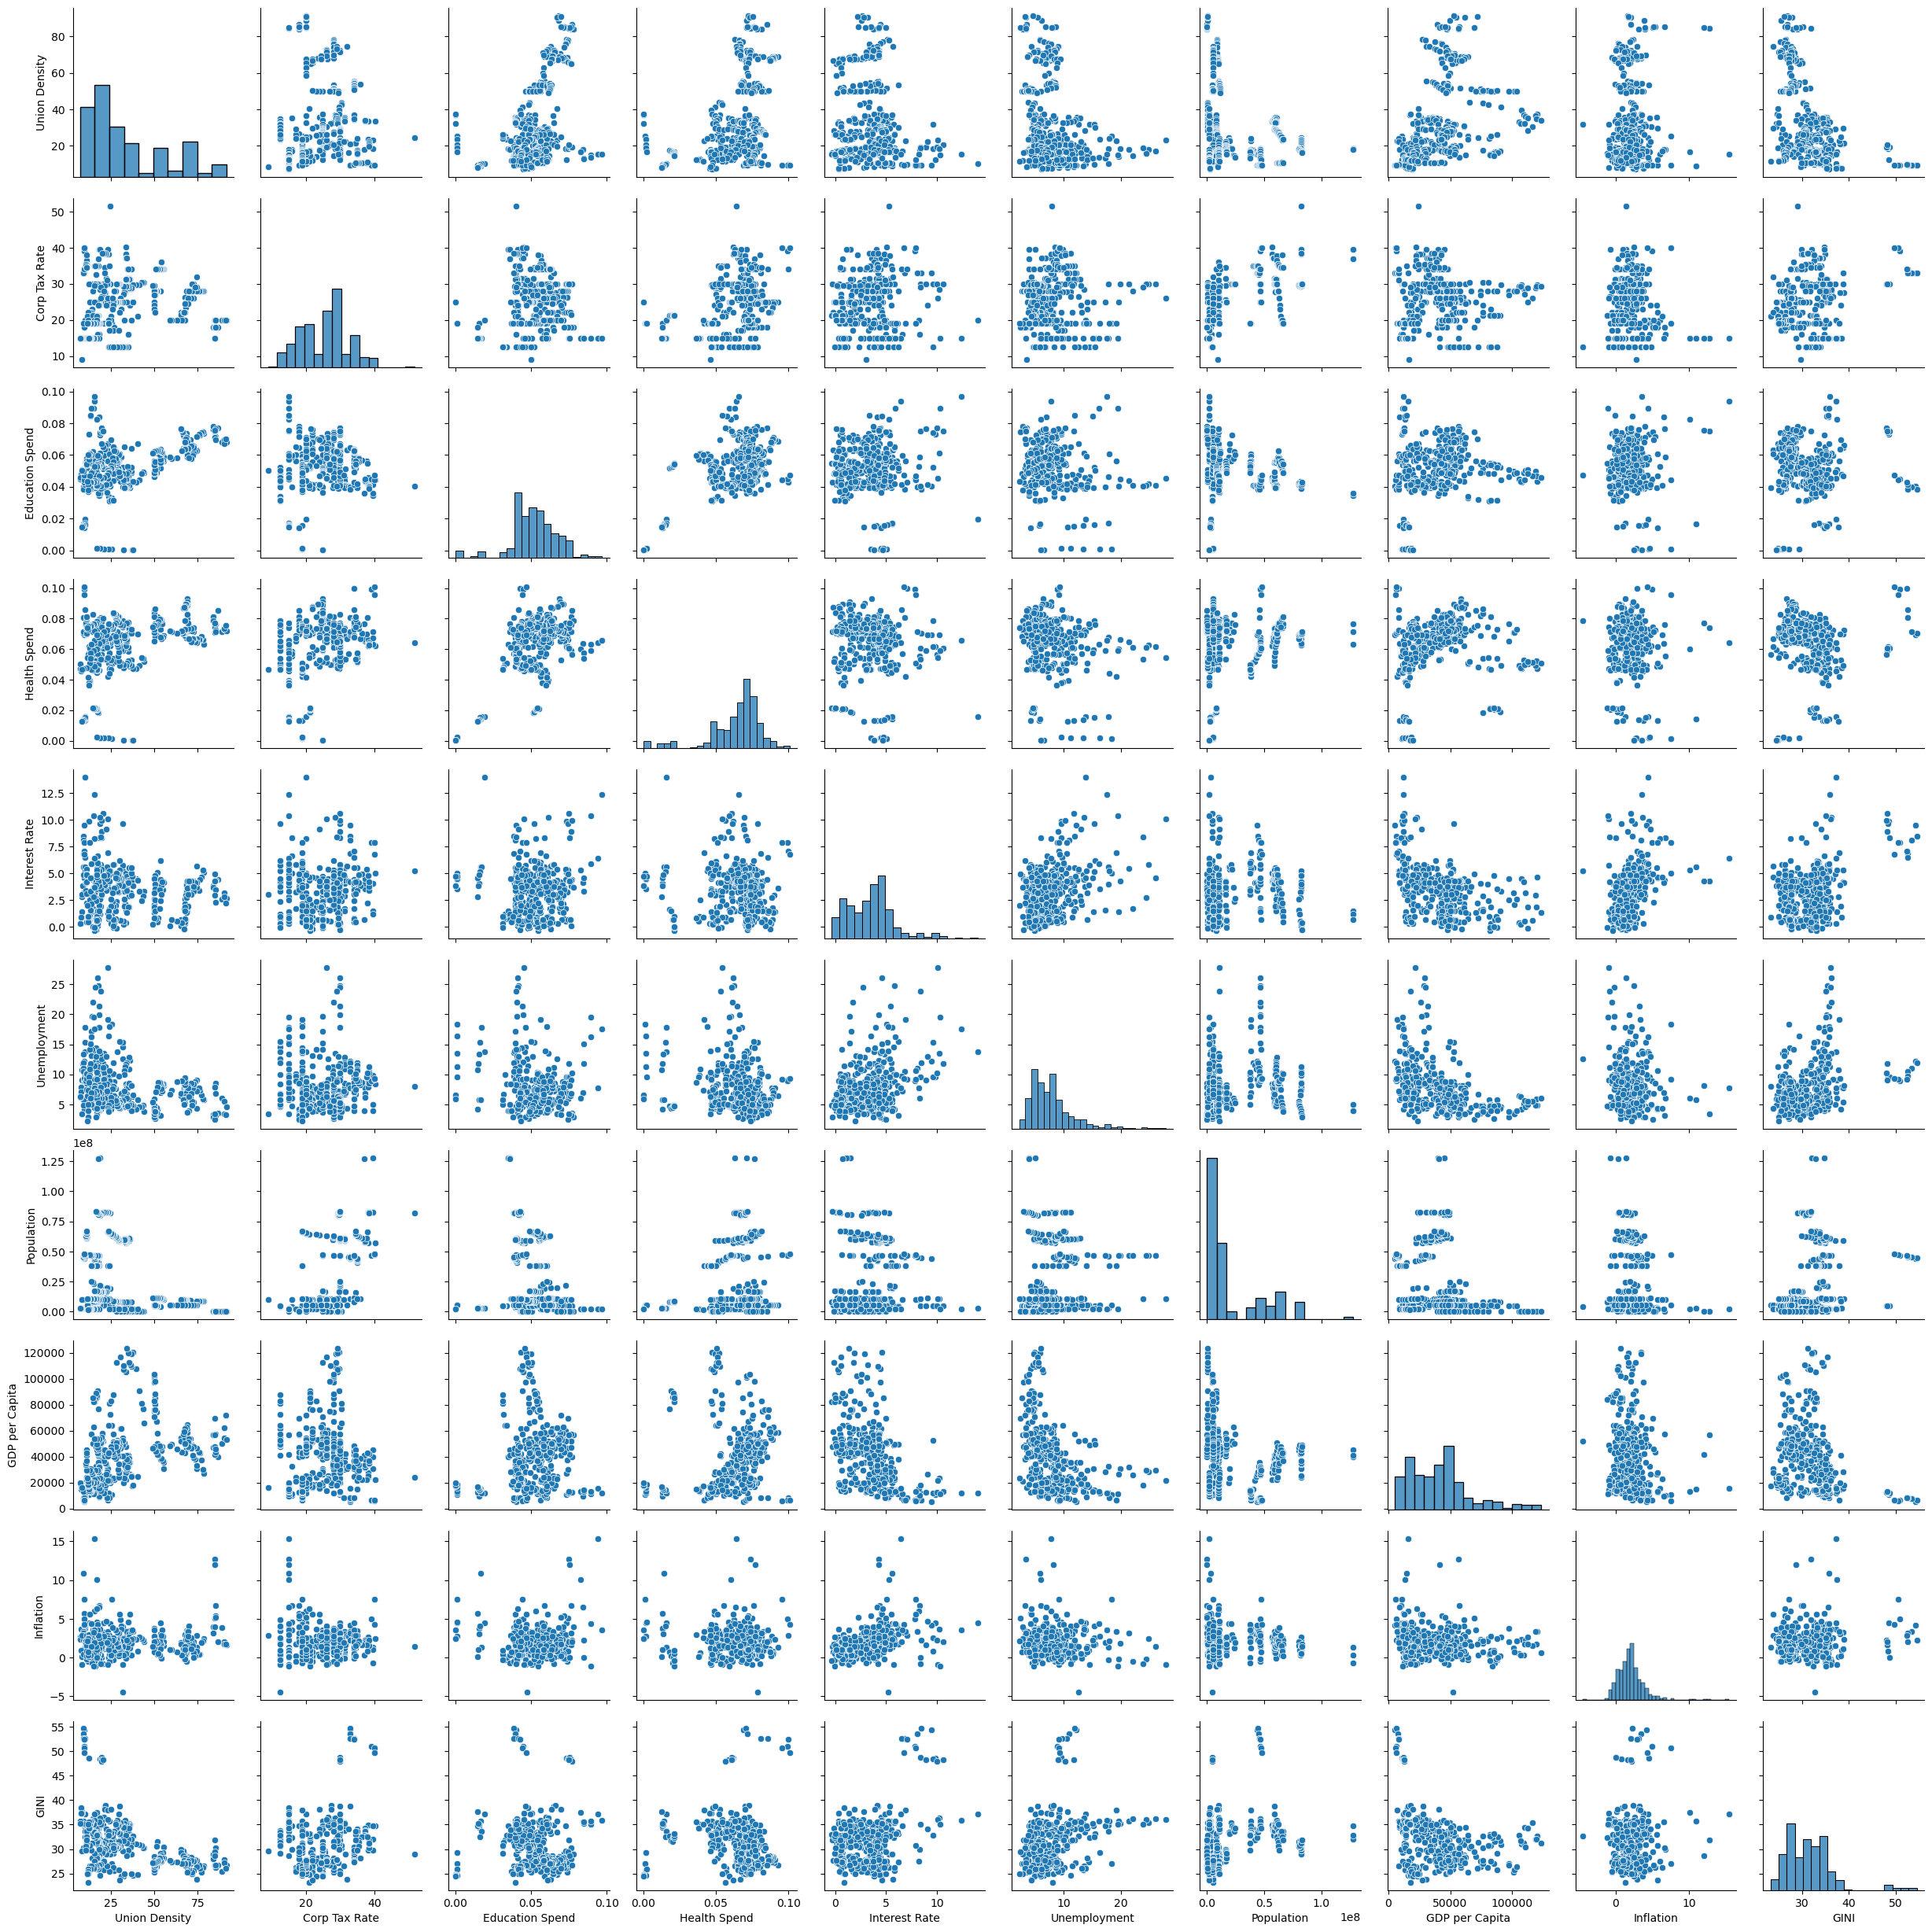

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Rename and select only the relevant columns
cols = {
    'Trade union density': 'Union Density',
    'Combined corporate income tax rate': 'Corp Tax Rate',
    'Education spending': 'Education Spend',
    'Health spending': 'Health Spend',
    'IRLT': 'Interest Rate',
    'UNEMP': 'Unemployment',
    'Population, total': 'Population',
    'GDP per capita (current US$)': 'GDP per Capita',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Gini index' : 'GINI'
}

df_pairplot = megaframe[list(cols.keys())].rename(columns=cols)

# Create the pairplot
sns.pairplot(df_pairplot)
plt.show()

In [46]:
len(set(megaframe['Reference area']))

30